# Ames Housing Data and Kaggle Challenge
## DATA CLEANING
***

*Import libraries and read in data:*

In [3]:
#Imports:

import numpy as np                # import numpy
import pandas as pd               # import pandas

import matplotlib.pyplot as plt   # import matplotlib
import seaborn as sns             # import seaborn

import missingno as msno          # import missingno

%matplotlib inline

In [11]:
# Read in the train and test data files
train = pd.read_csv('../datasets/train.csv')

### Initial Exploration of Data
***

In [12]:
# Display train data and shape
print(train.shape)
train.head()

(2051, 81)


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [13]:
# Look at data types (train)
train.dtypes

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

### Dealing with Nulls
***

26


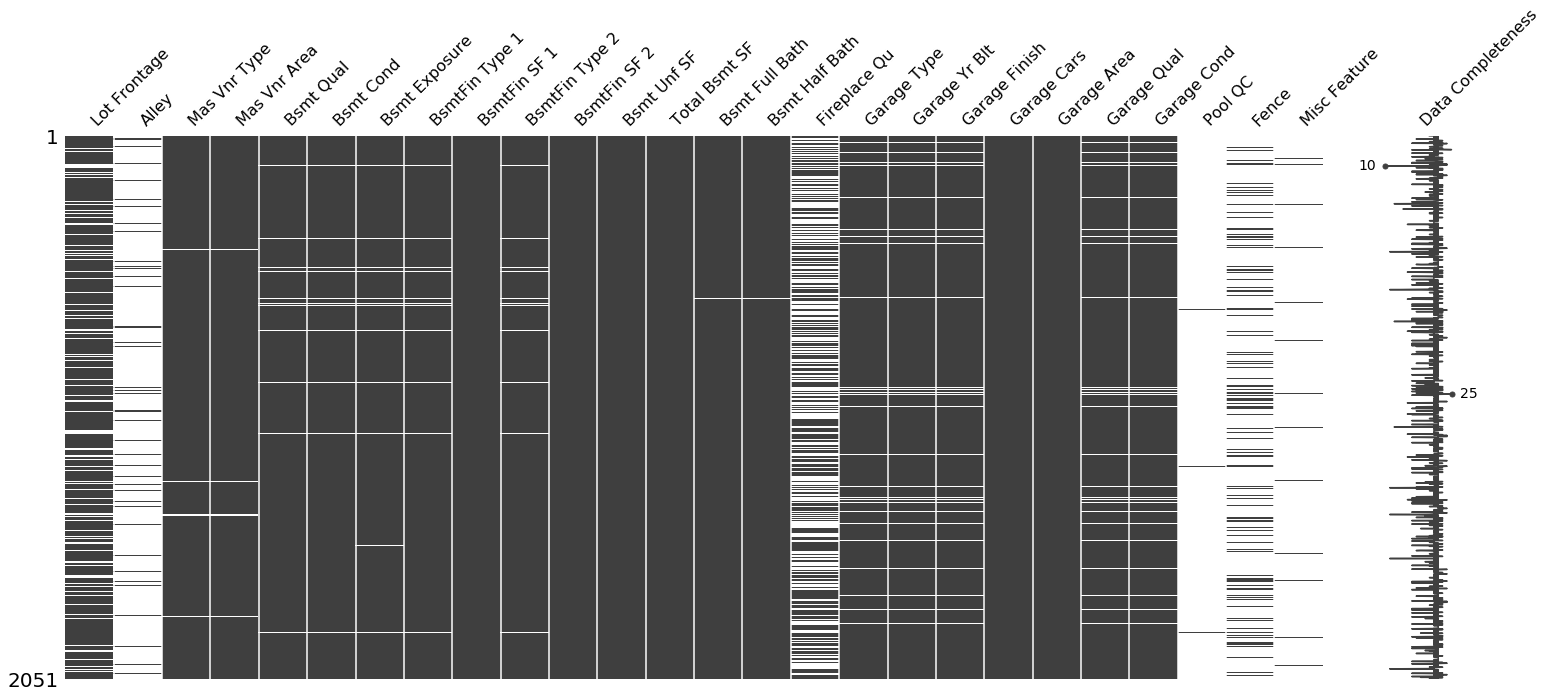

In [14]:
# Visualize missing values by column using missingo matrix for train and test
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())
msno.matrix(train[null_cols_train], labels=True);
#plt.show()
print(len(null_cols_train))
#null_cols_test = list(train2.isnull().sum()[train2.isnull().sum() != 0].keys())
#msno.matrix(train2[null_cols_test], labels=True);

Observations:
- There are quite a few columns with missing values
- Some of the missing value columns are in groups...i.e. Garages and Basements
- Train and test have issues with the same columns
    - Electrical looks like a column in test that has a null that does not occur in train

In [7]:
# Look at number of missing values per column in train:
train.isnull().sum()[train.isnull().sum() != 0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [8]:
# What is happening with 'Alley'? 1911 nulls in train, 821 in test

# According to the Data Dictionary:

  # Alley: Type of alley access to property
      # Grvl Gravel
      # Pave Paved
      # NA No alley access

print(train['Alley'].value_counts())
print(train['Alley'].isnull().sum())

Grvl    85
Pave    55
Name: Alley, dtype: int64
1911


In [9]:
# replace null valuse with string 'NA' to represent no alley access
train['Alley'].fillna('NA', inplace = True)
test['Alley'].fillna('NA', inplace = True)

In [10]:
# verify changes
print(train['Alley'].isnull().sum())
print(test['Alley'].isnull().sum())

0
0


In [11]:
# Let's look at 'Fireplace Qu' to see what's going on

# According to the Data Dictionary:

    # FireplaceQu: Fireplace quality
        # Ex Excellent - Exceptional Masonry Fireplace
        # Gd Good - Masonry Fireplace in main level
        # TA Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
        # Fa Fair - Prefabricated Fireplace in basement
        # Po Poor - Ben Franklin Stove
        # NA No Fireplace

# Need to take similar action as with 'Alley' column (replace nulls with string 'NA' to represent no fireplace)
train['Fireplace Qu'].fillna('NA', inplace = True)
test['Fireplace Qu'].fillna('NA', inplace = True)

In [12]:
# verify changes
print(train['Fireplace Qu'].isnull().sum())
print(test['Fireplace Qu'].isnull().sum())

0
0


In [13]:
# Let's see if similar things are happening with 'Pool QC', 'Fence' and 'Misc Feature' 
# (columns with tons of nulls)

# According to the Data Dictionary:

    # PoolQC: Pool quality
        # Ex Excellent
        # Gd Good
        # TA Average/Typical
        # Fa Fair
        # NA No Pool
    
    # Fence: Fence quality
        # GdPrv Good Privacy
        # MnPrv Minimum Privacy
        # GdWo Good Wood
        # MnWw Minimum Wood/Wire
        # NA No Fence

    # MiscFeature: Miscellaneous feature not covered in other categories
        # Elev Elevator
        # Gar2 2nd Garage (if not described in garage section)
        # Othr Other
        # Shed Shed (over 100 SF)
        # TenC Tennis Court
        # NA Non


# Need to take similar action on all three columns as with 'Alley' column (replace nulls with string 'NA')

In [14]:
# Replace nulls with string 'NA' to represent no pool
train['Pool QC'].fillna('NA', inplace = True)
test['Pool QC'].fillna('NA', inplace=True)

In [15]:
# Replace nulls with string 'NA' to represent no fence
train['Fence'].fillna('NA', inplace = True)
test['Fence'].fillna('NA', inplace = True)

In [16]:
# Replace nulls with string 'NA' to represent no misc. feature
train['Misc Feature'].fillna('NA', inplace = True)
test['Misc Feature'].fillna('NA', inplace = True)

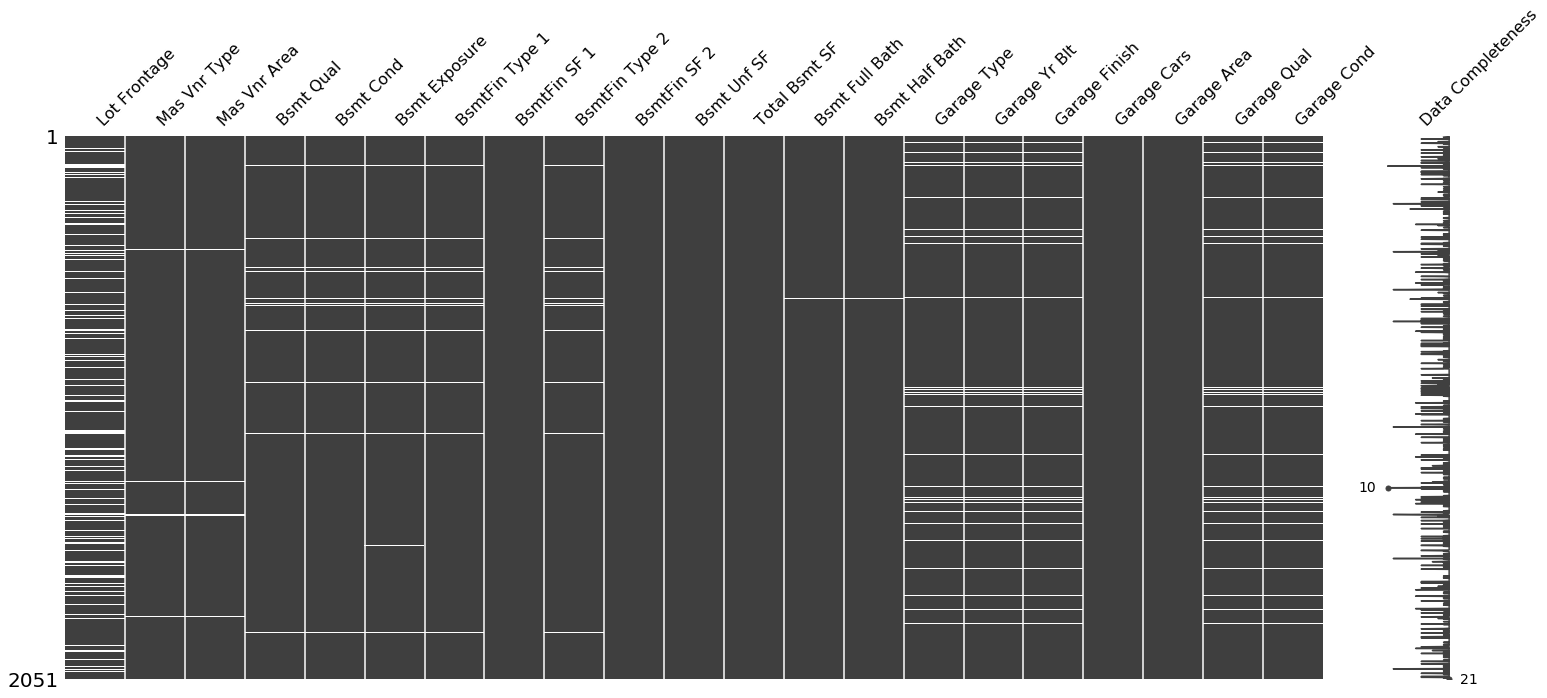

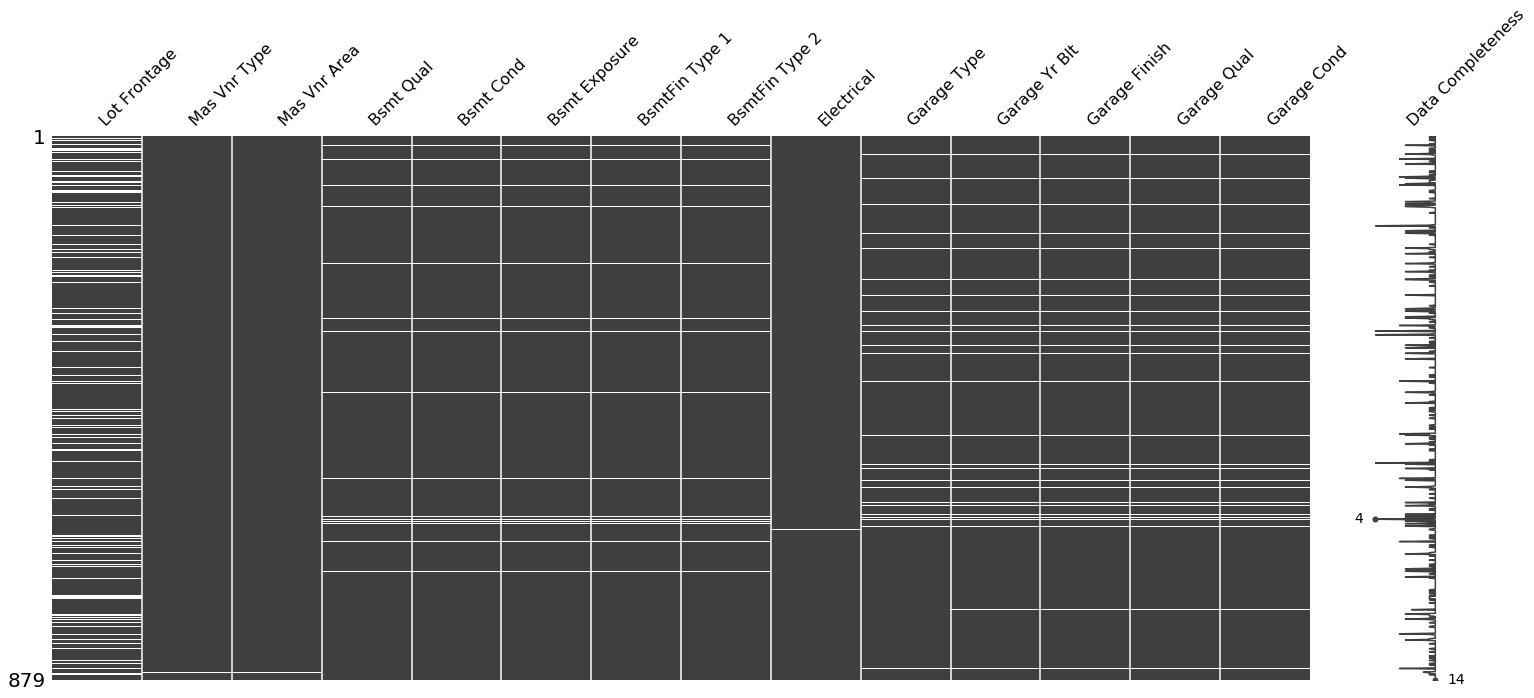

In [17]:
# Visualize missing values by column again using missingo matrix for train adn test
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())
msno.matrix(train[null_cols_train], labels=True);
plt.show()

null_cols_test = list(test.isnull().sum()[test.isnull().sum() != 0].keys())
msno.matrix(test[null_cols_test], labels=True);

Observations:
- I have cleaned up the columns with large whitespace...columns where NA's were being read in as nulls.
- Now I need to look at columns by group such as:
    - Basements
    - Garages
    - Mas Vnr (Masonry Veneer)

In [18]:
# Let's look at Basements in the train data
basement_columns = [column for column in train.columns if 'bsmt' in column.lower()]
train[train['Bsmt Qual'].isnull()][basement_columns].head(5)

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [19]:
train[basement_columns].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
0,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,0.0,0.0
1,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,1.0,0.0
2,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,1.0,0.0
3,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,0.0,0.0
4,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,0.0,0.0


In [20]:
# It is clear that these are all basements that do no exist - Bsmt SF(basement square feet) = 0

# According to the Data Dictionary:

    # BsmtQual: Height of the basement
        # Ex Excellent (100+ inches)
        # Gd Good (90-99 inches)
        # TA Typical (80-89 inches)
        # Fa Fair (70-79 inches)
        # Po Poor (<70 inches)
        # NA No Basement

    # BsmtCond: General condition of the basement
        # Ex Excellent
        # Gd Good
        # TA Typical - slight dampness allowed
        # Fa Fair - dampness or some cracking or settling
        # Po Poor - Severe cracking, settling, or wetness
        # NA No Basement
    
    # BsmtExposure: Walkout or garden level basement walls
        # Gd Good Exposure
        # Av Average Exposure (split levels or foyers typically score average or above)
        # Mn Mimimum Exposure
        # No No Exposure
        # NA No Basement
    
    # BsmtFinType1: Quality of basement finished area
        # GLQ Good Living Quarters
        # ALQ Average Living Quarters
        # BLQ Below Average Living Quarters
        # Rec Average Rec Room
        # LwQ Low Quality
        # Unf Unfinshed
        # NA No Basement
    
    # BsmtFinType2: Quality of second finished area (if present)
        # GLQ Good Living Quarters
        # ALQ Average Living Quarters
        # BLQ Below Average Living Quarters
        # Rec Average Rec Room
        # LwQ Low Quality
        # Unf Unfinshed
        # NA No Basement

# So NA = No Basement (will replace with 'NA')

basement_nulls = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
for col in basement_nulls:
    train[col].fillna('NA', inplace = True)
    test[col].fillna('NA', inplace = True)

In [21]:
# Verify change
print(train[basement_nulls].isnull().sum().sum())
print(test[basement_nulls].isnull().sum().sum())

0
0


In [22]:
# Let's look at Garages in the Train Data
garage_columns = [column for column in train.columns if 'garage' in column.lower()]
train[train['Garage Type'].isnull()][garage_columns].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN
101,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [23]:
train[garage_columns].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,1976.0,RFn,2.0,475.0,TA,TA
1,Attchd,1997.0,RFn,2.0,559.0,TA,TA
2,Detchd,1953.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA
4,Detchd,1957.0,Unf,2.0,484.0,TA,TA


In [24]:
# It is clear that these are all garages that do no exist - Garage Cars = 0, Garage Area = 0
# GarageYrBuil is an exception to this (GarageYrBlt: Year garage was built)

# According to the Data Dictionary:
    
    # GarageType: Garage location
        # 2Types More than one type of garage
        # Attchd Attached to home
        # Basment Basement Garage
        # BuiltIn Built-In (Garage part of house - typically has room above garage)
        # CarPort Car Port
        # Detchd Detached from home
        # NA No Garage

    # GarageFinish: Interior finish of the garage
        # Fin Finished
        # RFn Rough Finished
        # Unf Unfinished
        # NA No Garage

    # GarageQual: Garage quality
        # Ex Excellent
        # Gd Good
        # TA Typical/Average
        # Fa Fair
        # Po Poor
        # NA No Garage

    # GarageCond: Garage condition
        # Ex Excellent
        # Gd Good
        # TA Typical/Average
        # Fa Fair
        # Po Poor
        # NA No Garage
        
# So NA = No Garage (will replace with 'NA')
garage_nulls = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
for col in garage_nulls:
    train[col].fillna('NA', inplace = True)
    test[col].fillna('NA', inplace = True)

In [25]:
# Verify change
print(train[garage_nulls].isnull().sum().sum())
print(test[garage_nulls].isnull().sum().sum())

0
0


In [26]:
# Let's look at Garages Yr Built in the Train Data
train[train['Garage Yr Blt'].isnull()][garage_columns].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,NA,NaN,NA,0.0,0.0,NA,NA
53,NA,NaN,NA,0.0,0.0,NA,NA
65,NA,NaN,NA,0.0,0.0,NA,NA
79,NA,NaN,NA,0.0,0.0,NA,NA
101,NA,NaN,NA,0.0,0.0,NA,NA


In [27]:
# I will turn 'Garage Yr Blt' into 'Garage Age' where 2019-Year = Age and for NaN I will say 
train['Garage Yr Blt'] = train['Garage Yr Blt'].map(lambda x: 0 if np.isnan(x) else 2019 - x)
test['Garage Yr Blt'] = test['Garage Yr Blt'].map(lambda x: 0 if np.isnan(x) else 2019 - x)
train[garage_columns].head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
0,Attchd,43.0,RFn,2.0,475.0,TA,TA
1,Attchd,22.0,RFn,2.0,559.0,TA,TA
2,Detchd,66.0,Unf,1.0,246.0,TA,TA
3,BuiltIn,12.0,Fin,2.0,400.0,TA,TA
4,Detchd,62.0,Unf,2.0,484.0,TA,TA


In [28]:
# Rename column names to 'Garage Age'
train.rename(columns={'Garage Yr Blt': 'Garage Age'}, inplace=True)
test.rename(columns={'Garage Yr Blt': 'Garage Age'}, inplace=True)

In [29]:
garage_columns.remove('Garage Yr Blt')
garage_columns.append('Garage Age')

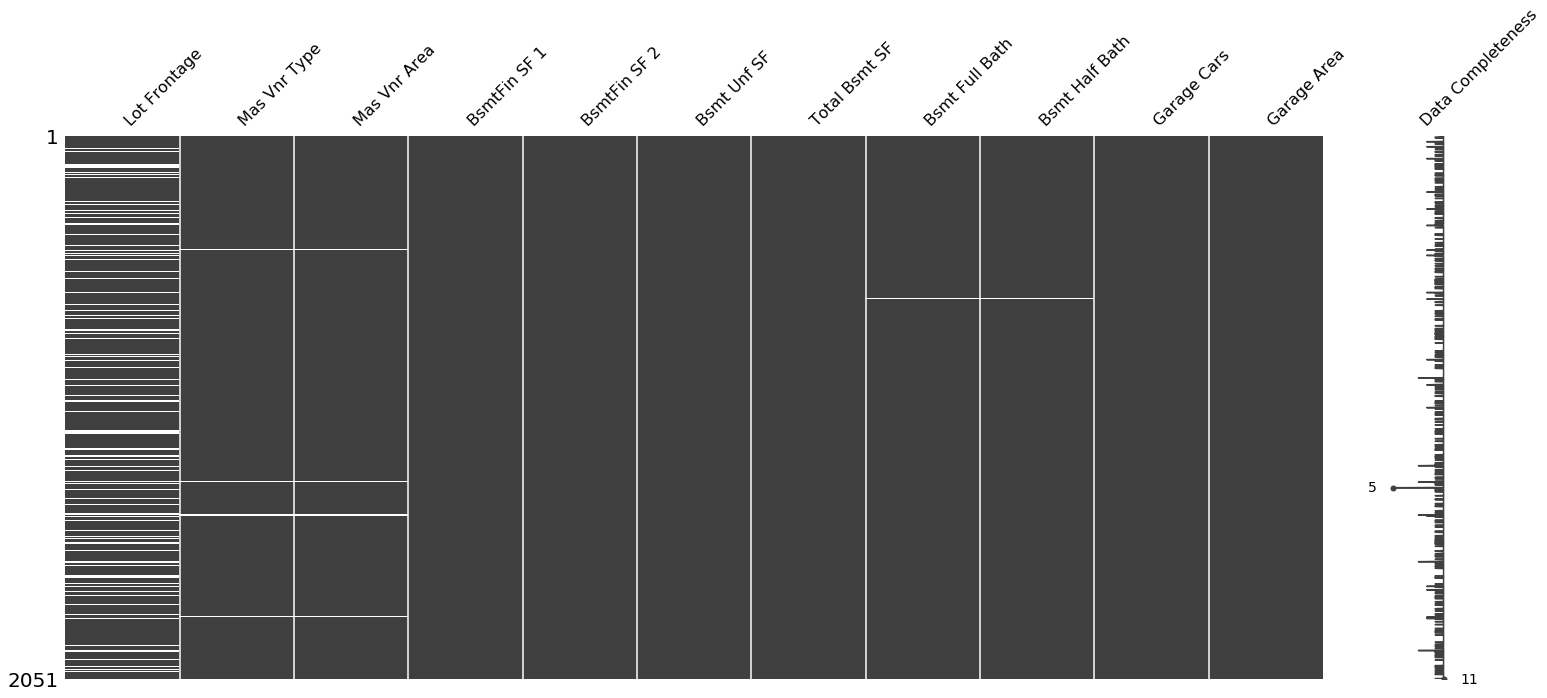

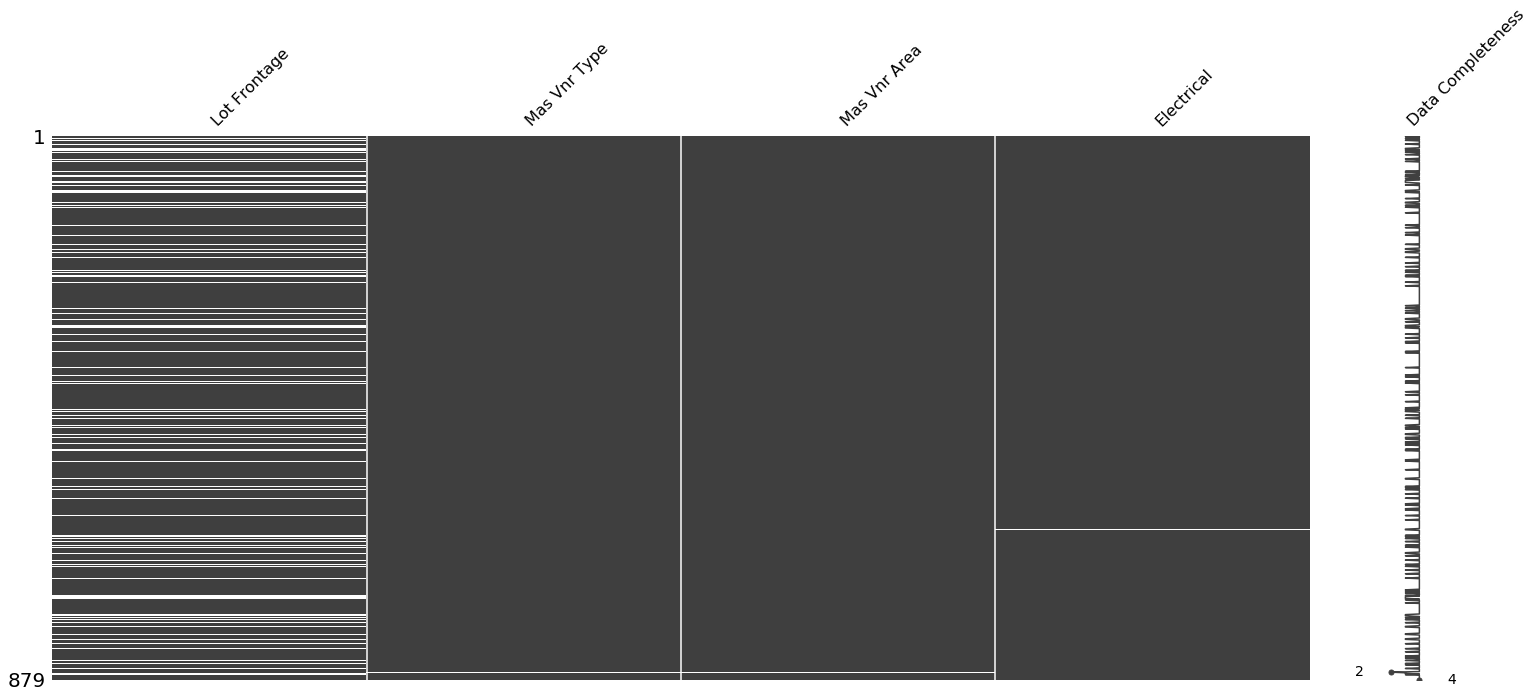

In [30]:
# Visualize missing values by column again using missingo matrix for train adn test
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())
msno.matrix(train[null_cols_train], labels=True);
plt.show()

null_cols_test = list(test.isnull().sum()[test.isnull().sum() != 0].keys())
msno.matrix(test[null_cols_test], labels=True);

In [31]:
train.isnull().sum()[train.isnull().sum() != 0]

Lot Frontage      330
Mas Vnr Type       22
Mas Vnr Area       22
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cars         1
Garage Area         1
dtype: int64

Observations:
- Garage and Basement columns are in good condition for test data, but not for train
    - one or two values in each of those columns still missing
- Mas Vnr still needs investigation
- Lot frontage has many missing that will need to be investigated

In [32]:
# Looking at the few few remaining missing values in 'Bsmt' Columns (Train)
train[train['Bsmt Full Bath'].isnull()][basement_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN
1327,NA,NA,NA,NA,NaN,NA,NaN,NaN,NaN,NaN,NaN


In [33]:
# Bsmt Qual = NA means no basement(Data Dictionary)...look at how other columns are filled when no basement
train[train['Bsmt Qual'] == 'NA'][basement_columns].head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
93,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
114,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
146,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
183,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0


In [34]:
# Based on other rows with no basement, these NAs on row 616 and 1327 should be 0.0
for col in ['BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']:
    train.loc[1327, col] = 0.0
    train.loc[616, col] = 0.0

In [35]:
# Verify changes
train.loc[[616, 1327]][basement_columns]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
616,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0
1327,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,0.0,0.0


In [36]:
# Looking at the one remaining missing values in 'Garage Cars' and 'Garage Area' (Train)
train[train['Garage Cars'].isnull()][garage_columns]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Garage Age
1712,Detchd,NA,NaN,NaN,NA,NA,0.0


In [37]:
# Look at other rows ot Garage Type = 'Detchd'
train[train['Garage Type'] == 'Detchd'][garage_columns].head()

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Garage Age
2,Detchd,Unf,1.0,246.0,TA,TA,66.0
4,Detchd,Unf,2.0,484.0,TA,TA,62.0
8,Detchd,Unf,1.0,420.0,TA,TA,67.0
10,Detchd,Unf,1.0,264.0,TA,TA,48.0
13,Detchd,Unf,2.0,480.0,TA,TA,19.0


In [38]:
# Based on the other columns we cannot fill in the missing values...I will remove this row (1712)
train.drop(1712, inplace=True)
train.shape # verify train has one less row (2051-1=2050)

(2050, 81)

In [39]:
# Looking at 'Mas Vnr' (Masonry Veneer) columns (Train)
mas_columns = [column for column in train.columns if 'vnr' in column.lower()]
train[train['Mas Vnr Type'].isnull()][mas_columns].head(5)

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN


In [40]:
# Look at values in each column
print(train['Mas Vnr Type'].value_counts())
print('Mas Vnr Type - Nulls:', train['Mas Vnr Type'].isnull().sum())

None       1217
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64
Mas Vnr Type - Nulls: 22


In [41]:
# According to the Data Dictionary:
    
    # MasVnrType: Masonry veneer type
        # BrkCmn Brick Common
        # BrkFace Brick Face
        # CBlock Cinder Block
        # None None
        # Stone Stone
        
# SO NA is not the same as NONE in this case

# Masonry Veneer has to do with the outside of the house, lets look at exterior columns
ext_columns = [column for column in train.columns if 'vnr' in column.lower() or 'ext' in column.lower()]
train[train['Mas Vnr Type'].isnull()][ext_columns].head()

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond
22,CemntBd,CmentBd,NaN,NaN,Gd,TA
41,VinylSd,VinylSd,NaN,NaN,Ex,TA
86,VinylSd,VinylSd,NaN,NaN,Gd,TA
212,VinylSd,VinylSd,NaN,NaN,Gd,TA
276,VinylSd,VinylSd,NaN,NaN,TA,TA


In [15]:
# Look at other rows where Exterior 1st = VinylSd
train[train['Exterior 1st'] == 'VinylSd'][ext_columns].head(10)

NameError: name 'ext_columns' is not defined

In [43]:
# There is no clear way to fill in these rows...since it is only 22 rows out of 2050 (1.07%) I will drop these rows
rows_to_drop = list(train[train['Mas Vnr Type'].isnull()].index)
train.drop(labels = rows_to_drop, inplace=True)

In [44]:
# Verify that 22 rows were dropped (2050 - 22 = 2028)
train.shape

(2028, 81)

In [45]:
# Looking at 'Mas Vnr' (Masonry Veneer) columns TEST - one row (cannot drop in test)
test[test['Mas Vnr Type'].isnull()][ext_columns]

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond
866,VinylSd,VinylSd,NaN,NaN,Gd,TA


In [46]:
# Look at the most common values of Mas Vnr Type for when Mas Vnr Type = VinylSd
test[test['Exterior 1st'] == 'VinylSd']['Mas Vnr Type'].value_counts()

None       149
BrkFace     95
Stone       56
BrkCmn       1
Name: Mas Vnr Type, dtype: int64

In [47]:
# Look at the most common values of Mas Vnr Area when Mas Vnr Type = VinylSd
test[test['Exterior 1st'] == 'VinylSd']['Mas Vnr Area'].value_counts().head()

0.0      148
80.0       3
306.0      3
256.0      2
216.0      2
Name: Mas Vnr Area, dtype: int64

In [48]:
# Majority of Exteriors with Vinyl Siding having Mas Vnr Type = None (will do this for the missing row)
# Since setting Mas Vnr Type to 'None', I will set 'Mas Vnr Area' to 0
test.loc[866, 'Mas Vnr Type'] = 'None'
test.loc[866, 'Mas Vnr Area'] = 0.0

In [49]:
# Verify changes
test.loc[[866]][ext_columns]

,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond
866,VinylSd,VinylSd,None,0.0,Gd,TA


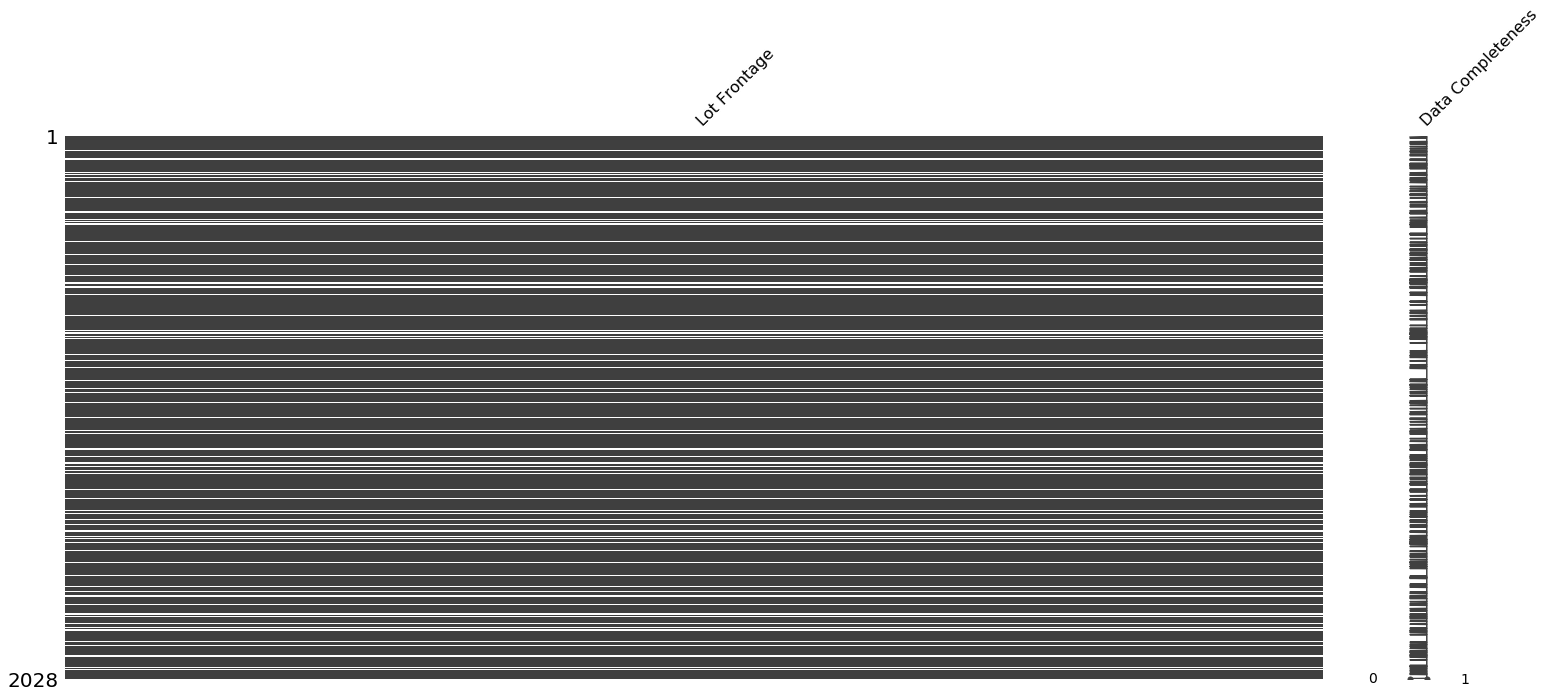

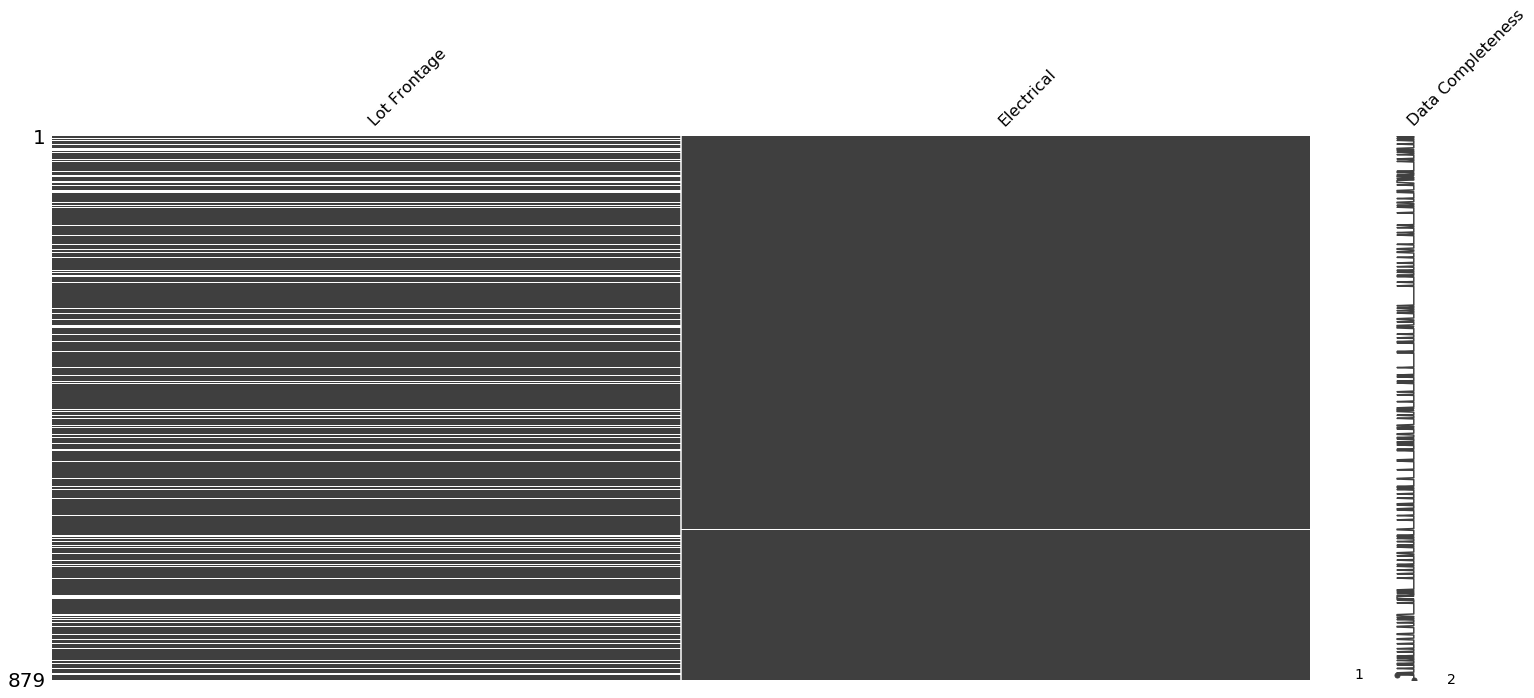

In [50]:
# Visualize missing values by column again using missingo matrix for train and test
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())
msno.matrix(train[null_cols_train], labels=True);
plt.show()

null_cols_test = list(test.isnull().sum()[test.isnull().sum() != 0].keys())
msno.matrix(test[null_cols_test], labels=True);

In [51]:
# Look at missing value(s) for electrical in test data
test[test['Electrical'].isnull()][['Electrical', 'Utilities']]

,Electrical,Utilities
635,NaN,AllPub


In [52]:
# Look at other values in 'Electrical' - most common is Sbrkr
test['Electrical'].value_counts()

SBrkr    814
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64

In [53]:
# When 'Electrical' equals 'SBrkr', 'Utilites' is always 'AllPub'
test[test['Electrical'] == 'SBrkr']['Utilities'].value_counts()

AllPub    814
Name: Utilities, dtype: int64

In [54]:
# Replace null at row 635 with 'SBrkr'
test.loc[635, 'Electrical'] = 'SBrkr'

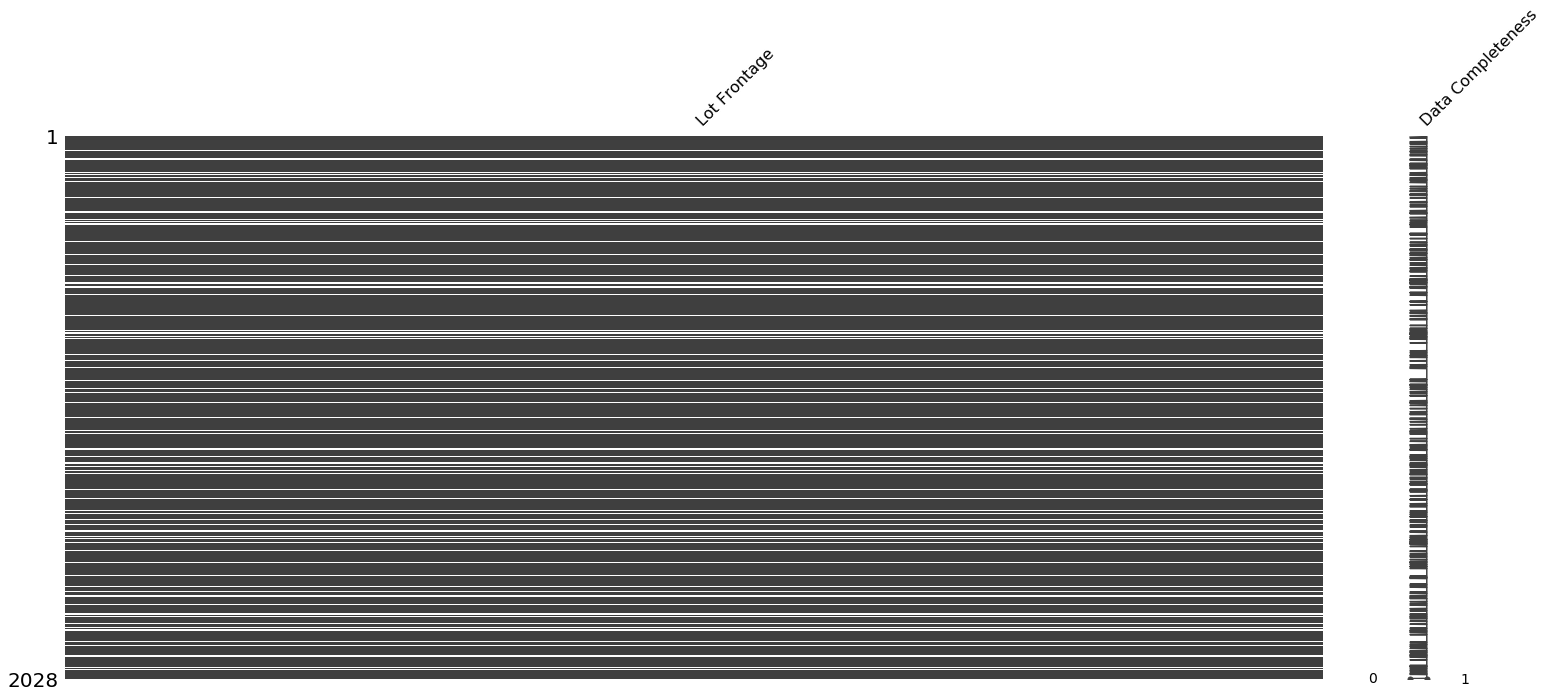

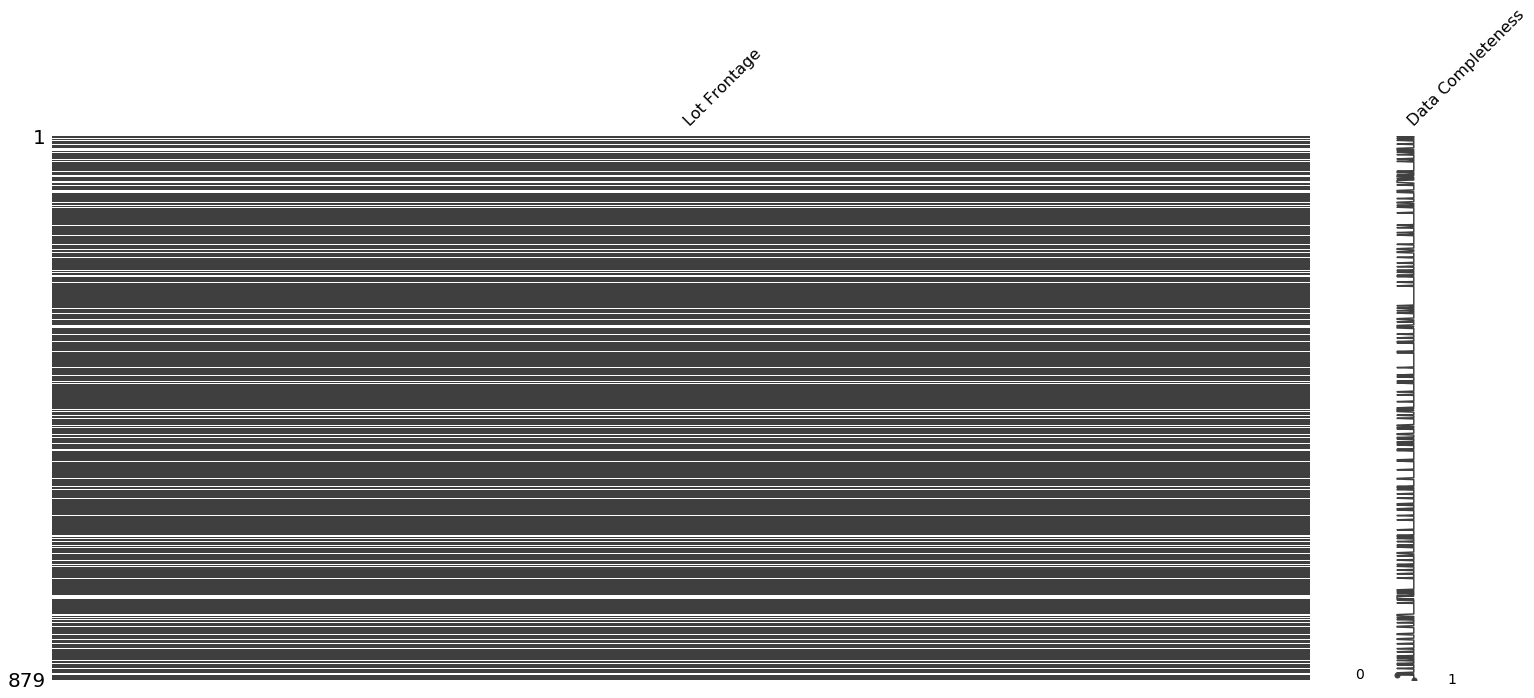

In [55]:
# Visualize missing values by column again using missingo matrix for train and test
null_cols_train = list(train.isnull().sum()[train.isnull().sum() != 0].keys())
msno.matrix(train[null_cols_train], labels=True);
plt.show()

null_cols_test = list(test.isnull().sum()[test.isnull().sum() != 0].keys())
msno.matrix(test[null_cols_test], labels=True);

### Build Model to Fill in Lot Frontage
***

In [56]:
# Reference: the below method is taken from kaggle project submission class notes in DEN Flex by Sam Stack

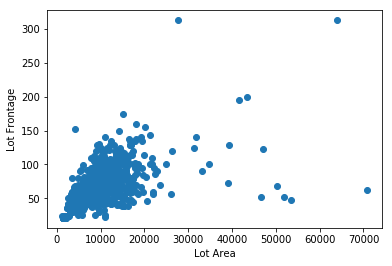

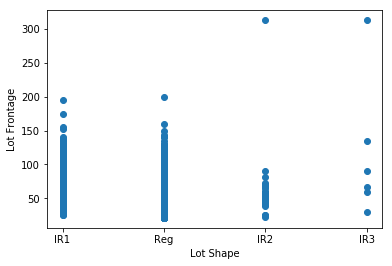

In [57]:
# Look at relationship between 'Lot Area'/'Lot Shape' and 'Lot Frontage'...Heteroskedastic
plt.scatter(train['Lot Area'],train['Lot Frontage'])
plt.xlabel('Lot Area')
plt.ylabel('Lot Frontage');
plt.show()

plt.scatter(train['Lot Shape'],train['Lot Frontage'])
plt.xlabel('Lot Shape')
plt.ylabel('Lot Frontage');

In [58]:
# 'Lot Shape' values
train['Lot Shape'].value_counts()

Reg    1283
IR1     682
IR2      54
IR3       9
Name: Lot Shape, dtype: int64

In [59]:
# Get dummies for 'Lot Shape' and drop Reg (the baseline)
lot_data = pd.get_dummies(train[['Lot Frontage','Lot Area','Lot Shape']])
lot_data.drop(columns=['Lot Shape_Reg'], inplace=True)

In [60]:
# Use 'Lot Area' and 'Lot Shape' (dummied) - lot_data df - to try and predict 'Lot Frontage'
lot_data.head()

,Lot Frontage,Lot Area,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3
0,NaN,13517,1,0,0
1,43.0,11492,1,0,0
2,68.0,7922,0,0,0
3,73.0,9802,0,0,0
4,82.0,14235,1,0,0


In [61]:
# This is the set of data with nulls for Lot Frontage
target_set = lot_data[lot_data['Lot Frontage'].isna()]
print(target_set.shape)
target_set.head()

(324, 5)


,Lot Frontage,Lot Area,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3
0,NaN,13517,1,0,0
7,NaN,12160,1,0,0
8,NaN,15783,0,0,0
23,NaN,7980,1,0,0
27,NaN,11700,1,0,0


In [62]:
# Set of data where lot frontage is known
build_set = lot_data[lot_data['Lot Frontage'].isna() == False ]
print(build_set.shape)
build_set.head()

(1704, 5)


,Lot Frontage,Lot Area,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3
1,43.0,11492,1,0,0
2,68.0,7922,0,0,0
3,73.0,9802,0,0,0
4,82.0,14235,1,0,0
5,137.0,16492,1,0,0


In [63]:
# Build the model
X = build_set.drop('Lot Frontage', axis = 1)
y = build_set['Lot Frontage']

In [64]:
# Import a standard scaler to standardize our values and import Linear Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [65]:
# Instantiate the scaler
SS = StandardScaler()

# scale our x data
X_scaled = SS.fit_transform(X)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
# Instantiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_scaled, y)

# Score the model
lr.score(X_scaled, y)

0.3540464289387225

In [67]:
# Function: if a value is null, apply the linear regression created, else return the original value
def apply_model(features):
    if np.isnan(features[0]):
        model_set = SS.transform(np.array(features[1:]).reshape(1,-1))
        return lr.predict(model_set.reshape(1, -1))[0]
    else:
        return features[0]

In [68]:
# Ignore Warning, apply model to train_df data
train['Lot Frontage_Preds'] = lot_data.apply(apply_model, axis =1)

In [69]:
train[['Lot Frontage', 'Lot Frontage_Preds']].head()

,Lot Frontage,Lot Frontage_Preds
0,NaN,80.991927
1,43.0,43.000000
2,68.0,68.000000
3,73.0,73.000000
4,82.0,82.000000


In [70]:
# Get dummies for 'Lot Shape' and drop Reg (the baseline)
lot_data_test = pd.get_dummies(test[['Lot Frontage','Lot Area','Lot Shape']])
lot_data_test.drop(columns=['Lot Shape_Reg'], inplace=True)

# This is the set of data with nulls for Lot Frontage
target_set_test = lot_data_test[lot_data_test['Lot Frontage'].isna()]
target_set_test.head()

# Set of data where lot frontage is known
build_set_test = lot_data_test[lot_data_test['Lot Frontage'].isna() == False ]
build_set_test.head()

# Build the model
X_test = build_set_test.drop('Lot Frontage', axis = 1)
y_test = build_set_test['Lot Frontage']

# Instantiate the scaler
SS = StandardScaler()

# scale our x data
X_scaled_test = SS.fit_transform(X_test)

# Instantiate the model
lr = LinearRegression()

# Fit the model
lr.fit(X_scaled_test, y_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
# Ignore Warning, apply model to train_df data
test['Lot Frontage_Preds'] = lot_data_test.apply(apply_model, axis =1)

test[['Lot Frontage', 'Lot Frontage_Preds']].head()

,Lot Frontage,Lot Frontage_Preds
0,69.0,69.000000
1,NaN,74.079052
2,58.0,58.000000
3,60.0,60.000000
4,NaN,73.905181


In [72]:
# Replace Lot Frontage with Lot Frontage_Preds values and drop Lot Frontage_Preds
train['Lot Frontage'] = train['Lot Frontage_Preds']
test['Lot Frontage'] = test['Lot Frontage_Preds']
train.drop('Lot Frontage_Preds', axis =1, inplace = True)
test.drop('Lot Frontage_Preds', axis =1, inplace = True)

### Binarize Columns with only 2 Values
***

In [73]:
# Return list of all variablees that have value_counts of 2 in test and train
for column in train.columns:
    if len(train[column].value_counts()) == 2:
        if len(train[column].value_counts()) == 2:
            print(column)
        

Street
Central Air


In [74]:
# Look at values for 'Street'
train['Street'].value_counts()

Pave    2021
Grvl       7
Name: Street, dtype: int64

In [75]:
# Map column to binary where 'Pave' = 1, 'Grvl' = 0
train['Street'] = train['Street'].map(lambda x: 1 if x == 'Pave' else 0)
train['Street'].value_counts()

1    2021
0       7
Name: Street, dtype: int64

In [76]:
# Look at values for 'Central Air'
train['Central Air'].value_counts()

Y    1887
N     141
Name: Central Air, dtype: int64

In [77]:
# Map column to binary where 'Yes' = 1, 'No' = 0
train['Central Air'] = train['Central Air'].map(lambda x: 1 if x == 'Y' else 0)
train['Central Air'].value_counts()

1    1887
0     141
Name: Central Air, dtype: int64

In [78]:
# Do the same for test sets
test['Street'] = test['Street'].map(lambda x: 1 if x == 'Pave' else 0)
test['Central Air'] = test['Central Air'].map(lambda x: 1 if x == 'Y' else 0)

### Fix Numerical Categories that  (e.g. MS SubClass)
***

In [79]:
# Reference: the below method is taken from kaggle project submission class notes in DEN Flex by Sam Stack

In [80]:
# If we look at MS SubClass it appears to be an into object, however reading the data dictionary reveals that 
# numeric numbers are being used to represent categories...need to convert from numerical to string
train['MS SubClass'] = train['MS SubClass'].astype(str)
test['MS SubClass'] = test['MS SubClass'].astype(str)

In [81]:
# Verify change
train[['MS SubClass']].dtypes

MS SubClass    object
dtype: object

### Make Quality/Conditon Columns with Rating Scale Numerical
***

In [82]:
# From Data Dictionary...variables that are rated on a scale from Poor to Excellent:
### ExterCond, BsmtCond, HeatingQC, FireplaceQu, GarageCond, PoolQC, 
### Exter Qual, Bsmt Qual, Kitchen Qual, Garage Qual
rating_cols = ['Exter Qual', 'Bsmt Qual', 'Kitchen Qual', 'Garage Qual',
              'Exter Cond', 'Bsmt Cond', 'Heating QC', 'Fireplace Qu', 'Garage Cond', 'Pool QC']

In [83]:
# Look at data types to confirm they are all categorical
train[rating_cols].dtypes

Exter Qual      object
Bsmt Qual       object
Kitchen Qual    object
Garage Qual     object
Exter Cond      object
Bsmt Cond       object
Heating QC      object
Fireplace Qu    object
Garage Cond     object
Pool QC         object
dtype: object

In [84]:
# Current ratings (values)
print(train['Bsmt Qual'].value_counts())

# Ex Excellent
# Gd Good
# TA Average/Typical
# Fa Fair
# Po Poor

TA    886
Gd    849
Ex    177
Fa     60
NA     55
Po      1
Name: Bsmt Qual, dtype: int64


In [85]:
# Create dictionary to map values
ratings_dict = {'Ex': 5,  # Excellent
                'Gd': 4,  # Good
                'TA': 3,  # Average/Typical
                'Fa': 2,  # Fair
                'Po': 1,  # Poor
                'NA': 0   # NA - doesn't exist (e.g. no basement, no pool, etc.)
               }

In [86]:
# For loop to change each categorical column to numerical values
for column in rating_cols:
    train[column] = train[column].map(ratings_dict)
    test[column] = test[column].map(ratings_dict)

In [87]:
# View new columns (train)
train[rating_cols].head(3)

,Exter Qual,Bsmt Qual,Kitchen Qual,Garage Qual,Exter Cond,Bsmt Cond,Heating QC,Fireplace Qu,Garage Cond,Pool QC
0,4,3,4,3,3,3,5,0,3,0
1,4,4,4,3,3,3,5,3,3,0
2,3,3,4,3,4,3,3,0,3,0


### Turn Year into Age
***

In [88]:
# Turn Year (Built) into Age (2010 - Year Built)
# 2010 because the study was 2006 to 2010
train['Year Built'] = 2010 - train['Year Built']
test['Year Built'] = 2010 - test['Year Built']

In [89]:
# Rename column names to 'Home Age'
train.rename(columns={'Year Built': 'Home Age'}, inplace=True)
test.rename(columns={'Year Built': 'Home Age'}, inplace=True)

In [90]:
train['Home Age'].head()

0     34
1     14
2     57
3      4
4    110
Name: Home Age, dtype: int64

In [91]:
# Drop houses where price less than $20,000
train[train['SalePrice'] < 20000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,1,NA,Reg,Low,...,0,0,0,NA,NA,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,1,NA,Reg,Lvl,...,0,0,0,NA,NA,0,6,2010,WD,12789


In [92]:
train.drop(labels=[183, 1628], inplace = True)

### Save Cleaned Dataset
***

In [93]:
# Save cleaned datasets
train.to_csv('../datasets/train_clean.csv')
test.to_csv('../datasets/test_clean.csv')

In [94]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,80.991927,13517,1,NA,IR1,Lvl,...,0,0,0,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000000,11492,1,NA,IR1,Lvl,...,0,0,0,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000000,7922,1,NA,Reg,Lvl,...,0,0,0,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000000,9802,1,NA,Reg,Lvl,...,0,0,0,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000000,14235,1,NA,IR1,Lvl,...,0,0,0,NA,NA,0,3,2010,WD,138500


In [95]:
train.isnull().sum().sum()

0